In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("tmdb_5000_movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


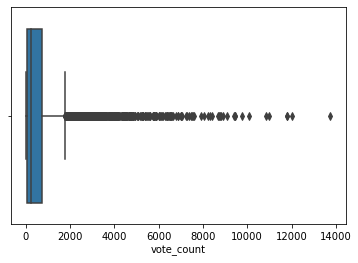

In [3]:
import seaborn as sns
sns.boxplot(df['vote_count'])

In [4]:
df['vote_count'].describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

In [4]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
#calculate vote mean average
C=df['vote_average'].mean()
print(C)

6.092171559442016


In [6]:
# Calculate the minimum number of votes required to be in the chart, m
m = df['vote_count'].quantile(0.85)
print(m)

1300.6999999999998


In [7]:
# Filter out all qualified movies into a new DataFrame
q_movies = df.copy()[df['vote_count'] >= m]
q_movies.shape

(721, 20)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_count'>

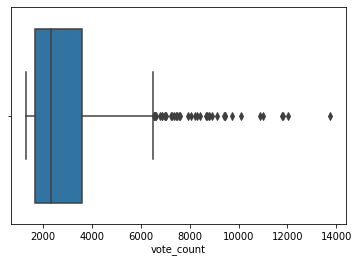

In [8]:
sns.boxplot(q_movies['vote_count'])

There are nearly 15% movies with vote count greater than 82.The user will get recommendation from this top 15% movies.

In [9]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [10]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [11]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 20 movies
q_movies[['title', 'vote_count', 'vote_average', 'score','overview']].head(20)

,title,vote_count,vote_average,score,overview
1881,The Shawshank Redemption,8205,8.5,8.170528,Framed in the 1940s for the double murder of h...
662,Fight Club,9413,8.3,8.031958,A ticking-time-bomb insomniac and a slippery s...
3232,Pulp Fiction,8428,8.3,8.004820,"A burger-loving hit man, his philosophical par..."
65,The Dark Knight,12002,8.2,7.993903,Batman raises the stakes in his war on crime. ...
3337,The Godfather,5893,8.4,7.982719,"Spanning the years 1945 to 1955, a chronicle o..."
96,Inception,13752,8.1,7.926504,"Cobb, a skilled thief who commits corporate es..."
809,Forrest Gump,7927,8.2,7.902889,A man with a low IQ has accomplished great thi...
95,Interstellar,10867,8.1,7.885368,Interstellar chronicles the adventures of a gr...
329,The Lord of the Rings: The Return of the King,8064,8.1,7.821125,Aragorn is revealed as the heir to the ancient...
1990,The Empire Strikes Back,5879,8.2,7.818138,"The epic saga continues as Luke Skywalker, in ..."


This represents a simple recommendation of top movies based on votes of the viewers.

## Building a content based system

In [12]:
#Print plot overviews of the first 5 movies.
q_movies['overview'].head()

1881    Framed in the 1940s for the double murder of h...
662     A ticking-time-bomb insomniac and a slippery s...
3232    A burger-loving hit man, his philosophical par...
65      Batman raises the stakes in his war on crime. ...
3337    Spanning the years 1945 to 1955, a chronicle o...
Name: overview, dtype: object

In [13]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

we have 75,827 different words and 45,466 movies.

Now, We will use the cosine similarity to calculate the similarity between each two movies

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix.astype(np.float32))

In [15]:
import pickle as pkl 

# Dump data to file
pkl.dump(cosine_sim, open('model.pkl', 'wb'))
# Load data from file